In [1]:
import sys
from PyQt5.QtWidgets import QApplication, QMainWindow, QLabel, QPushButton, QRadioButton, QLineEdit
import matplotlib.pyplot as plt
from PyQt5.QtGui import QGuiApplication, QFont
import numpy as np

Graph Plotting Function

In [2]:
def plot_graph(k, p, u, l, option_type):
    
    s = np.linspace(l, u, 200)
    #payoff formula

    buy_call = np.maximum(s - k, 0) - p
    sell_call = p - np.maximum(s - k, 0)
    buy_put = np.maximum(k - s, 0) - p
    sell_put = p - np.maximum(k - s, 0)

    plt.axhline(0, linewidth=1, linestyle="--")      
    plt.axvline(k,linewidth=1, linestyle="--")    

    if p>0 and option_type =="Call":
        plt.plot(s, buy_call, label="Buy Call")
    elif p<0 and option_type =="Call":
        plt.plot(s, sell_call, label="Sell Call")
    elif p>0 and option_type =="Put":
        plt.plot(s, buy_put, label="Buy Put")
    elif p<0 and option_type =="Call":
        plt.plot(s, sell_put, label="Sell Put")

    plt.title("Vanilla Options Payoff")
    plt.xlabel("Spot Price")
    plt.ylabel("Profit / Loss")

    plt.grid(True)

    plt.show()


GUI Interface

In [3]:
class MainWindow(QMainWindow):
    def __init__(self):
        super().__init__()
        width = 1000
        height = 700
        screen = QGuiApplication.primaryScreen().availableGeometry()
        x = int((screen.width() - width) / 2)
        y = int((screen.height() - height) / 2)
        self.setWindowTitle("Vanilla Options")
        self.setGeometry(x, y, width, height)

        label = QLabel("Vanilla Options Payoff", self)
        label.setFont(QFont("Poppins", 26, QFont.Bold))
        label.setStyleSheet("""
            QLabel {
                background-color: #222;
                color: white;
                padding: 10px 20px;
                border-radius: 20px;
            }
        """)
        label.setGeometry(230, 40, 550, 90)

        self.k = QLineEdit(self) 
        self.p = QLineEdit(self) 
        self.rl = QLineEdit(self)
        self.ru = QLineEdit(self)
        self.call = QRadioButton("Call", self)
        self.put = QRadioButton("Put", self)
        self.button = QPushButton("Submit", self)
        self.initUI()

    def initUI(self):
        #strike price
        strike = QLabel("Strike Price(K):", self)
        strike.setFont(QFont("Poppins", 20, QFont.Bold))
        strike.setGeometry(40, 150, 270, 40)

        self.k.setGeometry(300, 150, 100, 40)
        self.k.setStyleSheet("font-size: 25px;" 
                                     "font-family:Bold")
        #premium
        pre = QLabel("Premium(P):", self)
        pre.setFont(QFont("Poppins", 20, QFont.Bold))
        pre.setGeometry(40, 230, 250, 40)

        self.p.setGeometry(300, 230, 100, 40)
        self.p.setStyleSheet("font-size: 25px;" 
                                     "font-family:Bold")

        #range of spot price
        ranu = QLabel("Upper Limit:", self)
        ranu.setFont(QFont("Poppins", 20, QFont.Bold))
        ranu.setGeometry(40, 310, 250, 40)

        self.ru.setGeometry(300, 310, 180, 40)
        self.ru.setStyleSheet("font-size: 25px;" 
                                     "font-family:Bold")
        ranl = QLabel("Lower Limit:", self)
        ranl.setFont(QFont("Poppins", 20, QFont.Bold))
        ranl.setGeometry(40, 390, 250, 40)

        self.rl.setGeometry(300, 390, 180, 40)
        self.rl.setStyleSheet("font-size: 25px;" 
                                     "font-family:Bold")
        #type of option(typeo)
        type = QLabel("Type of Option:", self)
        type.setFont(QFont("Poppins", 20, QFont.Bold))
        type.setGeometry(40, 470, 280, 40)
        self.call.setGeometry(320, 470, 300, 50)
        self.put.setGeometry(410, 470, 300, 50)
        self.setStyleSheet("QRadioButton{"
                           "font-size: 30px;"
                           "padding: 10px;"
                           "font-family:Bold"
                           "}")

        #submit button
        self.button.setGeometry(600, 550, 150, 50)
        self.button.setFont(QFont("Poppins", 23, QFont.Bold))
        self.button.setStyleSheet("""
    background-color: black;
    color: white;
    border-radius: 10px;
""")
        self.button.clicked.connect(self.submit)
    

    def submit(self):
        if self.call.isChecked():
            option_type = "Call"
        elif self.put.isChecked():
            option_type = "Put"
        else:
            option_type = "None"
        premium = self.p.text()
        strike_price = self.k.text()
        if strike_price =="q":
            exit()
        uran = self.ru.text()
        lran = self.rl.text()
        premium = float(premium)
        strike_price = float(strike_price)
        uran = float(uran)
        lran = float(lran)
        plot_graph(strike_price, premium, uran, lran, option_type)
        


In [4]:
def main():
    app = QApplication(sys.argv)
    window = MainWindow()
    window.show()
    sys.exit(app.exec_())



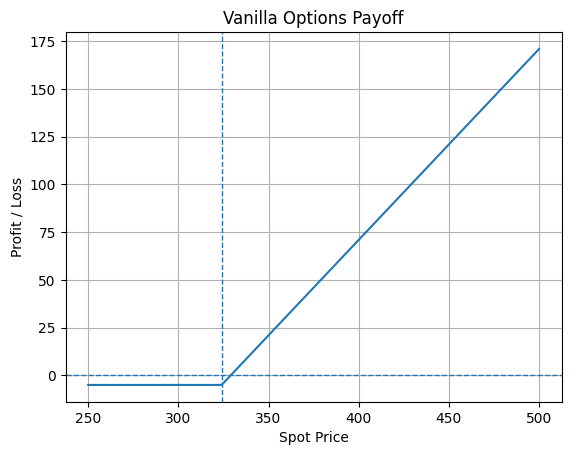

In [ ]:
if __name__ == "__main__" :
    main()

GREEKS:

1.Delta: It is rate of change of premium wrt underlying price.

    Range:
        Call:0-1
        Put:-1-0


2.Gamma:Rate of change of delta.

    Range:
        Call:0-infinite
        Put:0-infinite


3.Theta:Its the value lost per day 

    Range:
        Call:-infinite - 0
        Put:-infinite - 0


4.Vega:its the change of premium wrt the change based on volatility

    Range:
        Call:0-infinite
        Put:0-infinite


5.RHO:Change of option price wrt interest rate

    Range:
        Call:0-infinite
        Put:-infinite - 0